In [2]:
import polars as pl
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
# Path to the Parquet file
file_path = r"D:\20241207_week5_products_uav_data\output\extract\20241207_week5_project_12_IMG_0012_6.tif.parquet"

# Load the Parquet file into a Polars DataFrame
df = pl.read_parquet(file_path)

# Display the first few rowsSS
df

Xw,Yw,band1,band2,band3,band4,band5,elev,plot_id,delta_z,delta_x,delta_y,distance_xy,angle_rad,vza,vaa_rad,vaa_temp,vaa,xcam,ycam,sunelev,saa,path
f64,f64,f32,f32,f32,f32,f32,f32,str,f32,f64,f64,f64,f32,f32,f64,f64,f64,f32,f32,f32,f32,str
563632.195878,5.7130e6,NaN,NaN,NaN,NaN,NaN,187.88269,"""plot_8""",19.67897,14.366622,-5.13504,15.256752,0.91131,37.790001,1.914074,-61.123651,298.876349,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563632.203182,5.7130e6,NaN,NaN,NaN,NaN,NaN,187.877213,"""plot_8""",19.684448,14.359318,-5.135132,15.249905,0.911662,37.77,1.91424,-61.11409,298.88591,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563632.210486,5.7130e6,NaN,NaN,NaN,NaN,NaN,null,"""plot_8""",19.703262,14.352014,-5.135224,15.243058,0.912342,37.73,1.914407,-61.104521,298.895479,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563632.21779,5.7130e6,NaN,NaN,NaN,NaN,NaN,null,"""plot_8""",19.723648,14.34471,-5.135316,15.236212,0.91306,37.689999,1.914575,-61.094943,298.905057,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563632.225094,5.7130e6,NaN,NaN,NaN,NaN,NaN,null,"""plot_8""",19.726639,14.337406,-5.135407,15.229367,0.91335,37.669998,1.914742,-61.085356,298.914644,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
563633.867331,5.7130e6,0.012702,0.037408,0.015113,0.109692,0.3802,187.993378,"""plot_10""",19.568283,12.695169,-8.742923,15.414474,0.903584,38.23,2.173885,-46.237539,313.762461,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563633.874635,5.7130e6,0.012207,0.037203,0.014488,0.1003,0.365892,187.997192,"""plot_10""",19.564468,12.687865,-8.743015,15.408511,0.903677,38.220001,2.174159,-46.221854,313.778146,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563633.881939,5.7130e6,0.012204,0.035652,0.015033,0.092907,0.361171,188.00148,"""plot_10""",19.560181,12.680561,-8.743106,15.402549,0.903758,38.220001,2.174433,-46.206156,313.793844,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""


In [ ]:
"D:\20241207_week5_products_uav_data\output\extract\20241029_week8_project_0_IMG_0000_6.tif.parquet"

In [ ]:
import math

def latlon_to_utm32n_series(lat_deg, lon_deg):
    """
    Convert geographic coordinates (lat, lon in degrees, WGS84)
    to UTM Zone 32N (EPSG:32632) using the standard UTM formulas.

    Returns:
      (easting, northing) in meters.
    """
    # WGS84 ellipsoid constants
    a = 6378137.0                       # semi-major axis (meters)
    f = 1 / 298.257223563               # flattening
    e2 = 2*f - f**2                     # eccentricity squared
    e = math.sqrt(e2)

    # UTM parameters for Zone 32N
    k0 = 0.9996
    E0 = 500000.0                       # false easting
    N0 = 0.0                            # false northing (northern hemisphere)
    lambda0 = math.radians(9.0)         # central meridian for Zone 32N (9°E)

    # Convert input latitude and longitude from degrees to radians
    phi = math.radians(lat_deg)
    lam = math.radians(lon_deg)

    # Compute auxiliary values
    N_val = a / math.sqrt(1 - e2 * math.sin(phi)**2)
    T = math.tan(phi)**2
    # Second eccentricity squared
    ep2 = e2 / (1 - e2)
    C = ep2 * math.cos(phi)**2
    A = (lam - lambda0) * math.cos(phi)

    # Meridional arc length (M)
    M = a * (
          (1 - e2/4 - 3*e2**2/64 - 5*e2**3/256) * phi
        - (3*e2/8 + 3*e2**2/32 + 45*e2**3/1024) * math.sin(2*phi)
        + (15*e2**2/256 + 45*e2**3/1024) * math.sin(4*phi)
        - (35*e2**3/3072) * math.sin(6*phi)
    )

    # Calculate Easting and Northing using standard UTM series formulas
    easting = E0 + k0 * N_val * (
          A
        + (1 - T + C) * A**3 / 6
        + (5 - 18*T + T**2 + 72*C - 58*ep2) * A**5 / 120
    )

    northing = N0 + k0 * (
          M
        + N_val * math.tan(phi) * (
              A**2 / 2
            + (5 - T + 9*C + 4*C**2) * A**4 / 24
            + (61 - 58*T + T**2 + 600*C - 330*ep2) * A**6 / 720
        )
    )

    return easting, northing


# Test the function with a known point

coord = [9.9181978710164600, 51.5649526394502686]
easting, northing = latlon_to_utm32n_series(coord[1], coord[0])



print(f"Latitude: {coord[1]}, Longitude: {coord[0]}")
print(f"Easting: {easting:.2f} m, Northing: {northing:.2f} m")

In [ ]:
df.head(400)

In [ ]:

# Load the GPKG file
file_path =  "/run/media/mak/OS/example_data_week8/20241029_products_uav_data/20241204_oncerco_plot_polygons.gpkg"
gdf = gpd.read_file(file_path)

# Display the first few rows
print(gdf.head())
print(gdf.crs)


In [ ]:
gdf

In [ ]:
print(gdf.shape)  # Should show (number_of_rows, number_of_columns)
print(gdf.isnull().sum())  # Check for missing values
print(gdf.is_valid)  # Should return True for all rows


In [ ]:

# Load camera data (adjust delimiter as needed)
camera_df = pd.read_csv("/run/media/mak/OS/example_data_week8/20241029_products_uav_data/20241029_week8_cameras.txt", sep="\t",  skiprows=2, header=None, )

camera_df.columns = ['PhotoID', 'X', 'Y', 'Z', 'Omega', 'Phi', 'Kappa', 'r11', 'r12', 'r13',
                          'r21', 'r22', 'r23', 'r31', 'r32', 'r33']
# Create a geometry column (assuming X is longitude and Y is latitude)
camera_df['geometry'] = camera_df.apply(lambda row: Point(row['X'], row['Y']), axis=1)

# Create a GeoDataFrame with the camera data
camera_gdf = gpd.GeoDataFrame(camera_df, geometry='geometry', crs="EPSG:4326")

camera_gdf

In [ ]:
camera_in_projected = camera_gdf.to_crs("EPSG:32632")
camera_in_projected

In [ ]:
camera_in_projected.plot(aspect=1)


In [ ]:
gdf["camera points"] = camera_in_projected.geometry
gdf.plot(aspect=1)

In [ ]:
polygon = gdf["geometry"][0]
print(polygon)
print(gdf["geometry"][0])
i=0

for point in camera_in_projected["geometry"]:
    if polygon.contains(point):
        print(point)
        print(camera_in_projected["PhotoID"][i])

    i = i + 1




In [ ]:
polygon = gdf["geometry"][5]
for i in range(len(camera_df)):
    point = Point(latlon_to_utm32n_series(camera_df["Y"][i], camera_df["X"][i]))
   #print(f"function point {camera_in_projected["geometry"][i]} Library poinT: {point}  " )
    if polygon.contains(point):
        print(camera_df["PhotoID"][i])


In [ ]:
from rasterio.transform import from_origin
import rasterio
import logging

def parquet_to_multiband_tif(parquet_path, output_tif, band_columns=["band1", "band2", "band3"],
                             crs="EPSG:32632", nodata=None):
    """
    Reads a Parquet file containing georeferenced data and writes out a multi-band GeoTIFF.

    The Parquet file must include at least the following columns:
        - "Xw": x-coordinate (e.g., projected easting)
        - "Yw": y-coordinate (e.g., projected northing)
    and one or more band columns (e.g., "band1", "band2", "band3").

    Duplicate coordinate entries are aggregated by taking the mean.

    Parameters:
        parquet_path (str): Path to the input Parquet file.
        output_tif (str): Path where the output GeoTIFF will be saved.
        band_columns (list of str): List of column names to export as bands.
        crs (str): Coordinate reference system for the output GeoTIFF.
        nodata: Value to assign for missing data. If None, missing data remains as NaN.

    Returns:
        None. The GeoTIFF is written to output_tif.
    """
    # Read the Parquet file using Polars and convert to a Pandas DataFrame.
    df = pl.read_parquet(parquet_path)
    df_pd = df.to_pandas()

    # Check required coordinate columns
    if not {"Xw", "Yw"}.issubset(df_pd.columns):
        raise ValueError("The input file must contain 'Xw' and 'Yw' coordinate columns.")

    # Get unique coordinates for the grid.
    x_unique = np.sort(df_pd["Xw"].unique())
    # For rasters, Y is sorted in descending order (top-to-bottom).
    y_unique = np.sort(df_pd["Yw"].unique())[::-1]

    if len(x_unique) < 2 or len(y_unique) < 2:
        raise ValueError("Not enough unique coordinate values to form a raster grid.")

    # Calculate pixel size (assumes constant spacing)
    pixel_width = np.round(x_unique[1] - x_unique[0], 6)
    pixel_height = np.round(abs(y_unique[0] - y_unique[1]), 6)

    # Define the affine transform: origin is the top-left corner.
    origin_x = x_unique[0]
    origin_y = y_unique[0]
    transform = from_origin(origin_x, origin_y, pixel_width, pixel_height)

    band_arrays = []
    for band in band_columns:
        if band not in df_pd.columns:
            raise ValueError(f"Band column '{band}' not found in the input file.")
        print(df_pd)
        # Group by coordinates to aggregate duplicate (Xw, Yw) pairs (using mean).
        df_grouped = df_pd.groupby(["Xw", "Yw"], as_index=False)[band].mean()
        # Pivot the grouped data: rows by Yw, columns by Xw.
        pivot = df_grouped.pivot(index="Yw", columns="Xw", values=band)

        # Reindex to ensure all coordinate positions are present in the proper order.
        pivot = pivot.reindex(index=y_unique, columns=x_unique)
        band_array = pivot.values
        print("here")

        # Replace missing values with nodata if provided.
        if nodata is not None:
            band_array = np.where(np.isnan(band_array), nodata, band_array)
        band_arrays.append(band_array)

    # Use the dimensions from the first band.
    height, width = band_arrays[0].shape
    dtype = band_arrays[0].dtype

    logging.info(f"Raster dimensions: width={width}, height={height}")
    logging.info(f"Affine Transform: {transform}")
    logging.info(f"CRS: {crs}")

    # Write the multi-band GeoTIFF.
    with rasterio.open(
         output_tif,
         "w",
         driver="GTiff",
         height=height,
         width=width,
         count=len(band_columns),
         dtype=dtype,
         crs=crs,
         transform=transform,
         nodata=nodata
    ) as dst:
         for idx, band_array in enumerate(band_arrays, start=1):
             dst.write(band_array, idx)

    logging.info(f"GeoTIFF successfully saved to {output_tif}")


In [ ]:
parquet_path = file_path
output_tif = "./output.tif"
bands = ["band1", "band2", "band3"]  # adjust based on your data
parquet_to_multiband_tif(parquet_path, output_tif, bands, crs="EPSG:32632", nodata=0)

NameError: name 'xcam' is not defined

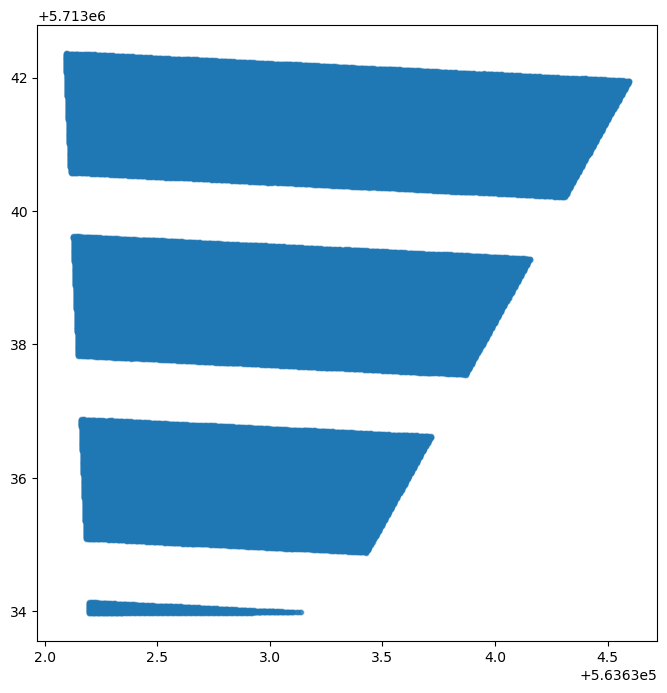

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df["Xw"], df["Yw"], s=10, alpha=0.5, label="Ground Points")
plt.scatter([xcam], [ycam], c='red', label="Drone")

# Draw view vectors
for i in range(0, len(df), step):  # Use step to avoid clutter
    plt.plot([xcam, df["Xw"][i]], [ycam, df["Yw"][i]], alpha=0.3)

plt.legend()
plt.title("Top-Down Projection of Drone to Ground Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
